In [1]:
#引入pandas库
import pandas as pd

In [2]:
#导入数据集
df=pd.read_csv('data.csv',encoding='utf-8')

In [3]:
#查看数据集
df.head(3)

,class_small,class_strong,delivery_place,doc_class,doc_subclass,doc_type,favorite_num,id,opinion_high,opinion_low,...,shop_name,shop_url,site_domain,site_ip,site_name,spider_ip,task_group,task_id,task_name,tax_fee_num
0,礼服/演出服,童装,NaN,2004.0,200401.0,20.0,0.0,6#20171019#46beed7a3c670c551f6cac692fa24547,0.0,0.0,...,悍风方俊专卖店,http://mall.jd.com/index-191073.html,item.jd.com,111.206.231.1,京东,192.168.21.82,2017-10-12,www.jd.com,京东,0.0
1,礼服/演出服,童装,NaN,2004.0,200401.0,20.0,0.0,9#20171019#aa1861c960950295441e68177c07486f,5.0,0.0,...,尚品琳演出服旗舰店,http://mall.jd.com/index-668645.html,item.jd.com,111.206.231.1,京东,192.168.21.82,2017-10-12,www.jd.com,京东,0.0
2,羽绒服,童装,浙江宁波市,2004.0,200401.0,20.0,0.0,6#20171019#fe05ca84b950611bf907e1888db4429a,0.0,0.0,...,惠美优母婴专营店,http://mall.jd.com/index-721860.html,item.jd.com,111.206.231.1,京东,192.168.21.82,2017-10-12,www.jd.com,京东,0.0


In [4]:
#查看列标签
df.columns

Index(['class_small', 'class_strong', 'delivery_place', 'doc_class',
       'doc_subclass', 'doc_type', 'favorite_num', 'id', 'opinion_high',
       'opinion_low', 'opinion_middle', 'opinion_num', 'origin_price',
       'page_fetch_time', 'page_publish_time', 'page_save_time', 'page_size',
       'page_url', 'pro_brand', 'pro_class', 'pro_code', 'pro_freight',
       'pro_impression', 'pro_name', 'pro_place', 'pro_property',
       'pro_sales_num', 'pro_score', 'pro_total_num', 'pro_type', 'sale_price',
       'shop_name', 'shop_url', 'site_domain', 'site_ip', 'site_name',
       'spider_ip', 'task_group', 'task_id', 'task_name', 'tax_fee_num'],
      dtype='object')

In [5]:
#数据评估
#检查数据集的行数和列数
df.shape

(703500, 41)

In [6]:
#缺失值检查
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703500 entries, 0 to 703499
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   class_small        703500 non-null  object 
 1   class_strong       703500 non-null  object 
 2   delivery_place     363261 non-null  object 
 3   doc_class          703500 non-null  float64
 4   doc_subclass       703500 non-null  float64
 5   doc_type           703500 non-null  float64
 6   favorite_num       703500 non-null  float64
 7   id                 703500 non-null  object 
 8   opinion_high       703500 non-null  float64
 9   opinion_low        703500 non-null  float64
 10  opinion_middle     703500 non-null  float64
 11  opinion_num        703500 non-null  float64
 12  origin_price       703500 non-null  float64
 13  page_fetch_time    703500 non-null  object 
 14  page_publish_time  703500 non-null  object 
 15  page_save_time     703500 non-null  object 
 16  pa

In [7]:
#数据重复检查
df.duplicated().sum()

280800

In [8]:
#数据清洗
#删除无关列
df.drop( ['class_strong', 'delivery_place', 'doc_class',
       'doc_subclass', 'doc_type', 'favorite_num', 'id', 'opinion_high',
       'opinion_low', 'opinion_middle', 'opinion_num', 'origin_price',
       'page_fetch_time', 'page_publish_time', 'page_save_time', 'page_size',
       'page_url', 'pro_brand', 'pro_class', 'pro_freight',
       'pro_impression',  'pro_place', 'pro_property',
        'pro_score', 'pro_total_num',
       'shop_name', 'shop_url', 'site_domain', 'site_ip', 'site_name',
       'spider_ip', 'task_group', 'task_id', 'task_name', 'tax_fee_num'],axis=1,inplace=True)

In [9]:
#检查：删除结果
df.columns

Index(['class_small', 'pro_code', 'pro_name', 'pro_sales_num', 'pro_type',
       'sale_price'],
      dtype='object')

In [10]:
#添加新列：销售额
df['sales']=df['pro_sales_num']*df['sale_price']

In [11]:
#检查：新列添加结果
df.head()

,class_small,pro_code,pro_name,pro_sales_num,pro_type,sale_price,sales
0,礼服/演出服,13518042094,HUMG FENG品牌儿童礼服裙女童公主裙花童生日小礼服演出服婚纱主持人蓬蓬裙 藕色 130cm,0.0,男装/女装/童装/内衣,999.0,0.0
1,礼服/演出服,12392911311,尚品琳儿童舞蹈服装夏季幼儿女童练功服短袖考级服连体服芭蕾舞裙 曜石黑 120cm,5.0,男装/女装/童装/内衣,69.0,345.0
2,羽绒服,18069763959,2017新款秋冬童装男童女童棉衣儿童轻薄羽绒棉服短款宝宝棉袄 817502红色男 150cm,0.0,男装/女装/童装/内衣,421.4,0.0
3,羽绒服,18019573791,七范童装儿童羽绒服女童冬季羽绒服中长款保暖羽绒服2017新款男童装时尚羽绒服 黑色 110,0.0,男装/女装/童装/内衣,175.0,0.0
4,羽绒服,17123280896,觅唯冬装新品女童中大童可爱棉衣儿童连帽毛球棉衣 玫红色 160cm,0.0,男装/女装/童装/内衣,177.0,0.0


In [12]:
#缺失数据处理
df.dropna(inplace=True)

In [13]:
#检查：缺失数据处理结果
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703500 entries, 0 to 703499
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   class_small    703500 non-null  object 
 1   pro_code       703500 non-null  int64  
 2   pro_name       703500 non-null  object 
 3   pro_sales_num  703500 non-null  float64
 4   pro_type       703500 non-null  object 
 5   sale_price     703500 non-null  float64
 6   sales          703500 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 42.9+ MB


In [14]:
#重复数据处理
df.drop_duplicates(inplace=True)

In [15]:
#检查：重复数据处理结果
df.duplicated().sum()

0

In [16]:
#数据探索&得出结果
#问题一：各商品类目下，商品的数量、销售和销售额是多少？
#1.各类目的商品数量
df['pro_type'].value_counts()

家居/家具/家装/厨具    65220
男装/女装/童装/内衣    59502
>男鞋/运动/户外      55498
图书/音像/电子书      53261
汽车/汽车用品        50301
女鞋/箱包/钟表/珠宝    36433
电脑/办公          19063
母婴/玩具乐器        15879
美妆个护/宠物        15327
手机/运营商/数码      14839
食品/酒类/生鲜/特产    10642
礼品鲜花/农资绿植      10606
医药保健/计生情趣      10564
机票/酒店/旅游/生活     3539
家用电器            2026
Name: pro_type, dtype: int64

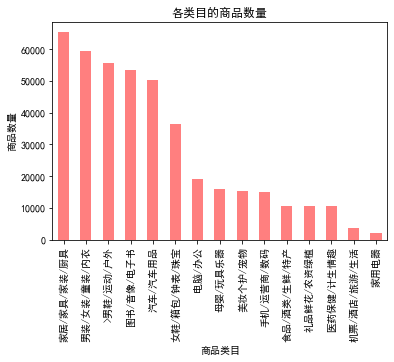

In [17]:
import matplotlib.pyplot as plt
from pylab import mpl#解决中文字体显示不正常的问题
mpl.rcParams['font.sans-serif']=['SimHei']#解决中文字体显示不正常的问题
df['pro_type'].value_counts().plot(kind='bar',title='各类目的商品数量',color='red',alpha=0.5)
plt.xlabel('商品类目')
plt.ylabel('商品数量')
plt.show()

In [18]:
#2.各类目的商品销量
df['pro_sales_num'].groupby(df['pro_type']).sum().sort_values(ascending=False)

pro_type
电脑/办公          8969658.0
汽车/汽车用品        8468730.0
手机/运营商/数码      7030599.0
食品/酒类/生鲜/特产    5464119.0
美妆个护/宠物        4092792.0
男装/女装/童装/内衣    3876258.0
母婴/玩具乐器        3712002.0
家居/家具/家装/厨具    3689160.0
医药保健/计生情趣      3651409.0
女鞋/箱包/钟表/珠宝    3440536.0
>男鞋/运动/户外      2522680.0
图书/音像/电子书      1397725.0
礼品鲜花/农资绿植       726757.0
家用电器            560519.0
机票/酒店/旅游/生活      12993.0
Name: pro_sales_num, dtype: float64

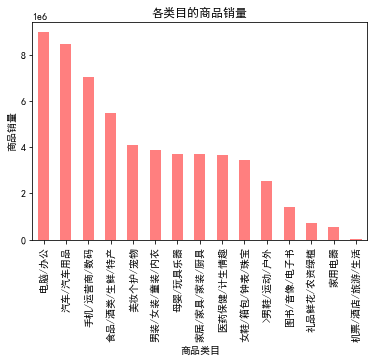

In [19]:
import matplotlib.pyplot as plt
from pylab import mpl#解决中文字体显示不正常的问题
mpl.rcParams['font.sans-serif']=['SimHei']#解决中文字体显示不正常的问题
sale_num=df['pro_sales_num'].groupby(df['pro_type']).sum().sort_values(ascending=False)
sale_num.plot(kind='bar',title='各类目的商品销量',color='red',alpha=0.5)
plt.xlabel('商品类目')
plt.ylabel('商品销量')
plt.show()

In [20]:
#3.各类目的商品的销售额
df['sales'].groupby(df['pro_type']).sum().sort_values(ascending=False)

pro_type
电脑/办公          3.513580e+09
手机/运营商/数码      1.591985e+09
汽车/汽车用品        1.280715e+09
家居/家具/家装/厨具    1.001587e+09
女鞋/箱包/钟表/珠宝    9.301880e+08
母婴/玩具乐器        7.336962e+08
>男鞋/运动/户外      6.970689e+08
男装/女装/童装/内衣    5.477171e+08
医药保健/计生情趣      4.800351e+08
食品/酒类/生鲜/特产    4.143528e+08
家用电器           3.630203e+08
美妆个护/宠物        3.388113e+08
图书/音像/电子书      8.838887e+07
礼品鲜花/农资绿植      4.331135e+07
机票/酒店/旅游/生活    7.170036e+05
Name: sales, dtype: float64

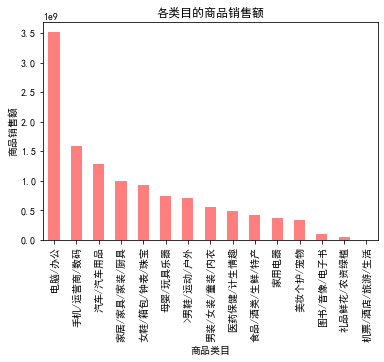

In [21]:
import matplotlib.pyplot as plt
from pylab import mpl#解决中文字体显示不正常的问题
mpl.rcParams['font.sans-serif']=['SimHei']#解决中文字体显示不正常的问题
sales_num=df['sales'].groupby(df['pro_type']).sum().sort_values(ascending=False)
sales_num.plot(kind='bar',title='各类目的商品销售额',color='red',alpha=0.5)
plt.xlabel('商品类目')
plt.ylabel('商品销售额')
plt.show()

In [22]:
#问题二：在“笔记本”小分类下，商品的最高、最低和平均价格是多少？具体的价格分布情况是怎样的？
#1.把笔记本小分类下面的所有商品信息都筛选出来
df_laptop=df[df['class_small']=='笔记本']

In [23]:
#2.计算商品的最高、最低和平均价格
#方法一：max,min,mean
#最高价格
df_laptop['sale_price'].max()

29999.0

In [24]:
#最低价格
df_laptop['sale_price'].min()

799.0

In [25]:
#平均价格
df_laptop['sale_price'].mean()

7352.958283671037

In [26]:
df.query('class_small=="笔记本" and sale_price>3000')

,class_small,pro_code,pro_name,pro_sales_num,pro_type,sale_price,sales
13345,笔记本,14445807638,（华为)HUAWEI MateBook D 15.6英寸轻薄窄边框笔记本电脑超薄本 金 官配...,13.0,电脑/办公,6988.0,90844.0
13353,笔记本,11493884089,宏碁(acer)蜂鸟Swift3 14英寸全金属轻薄笔记本电脑SF314 IPS 指纹识别 ...,6.0,电脑/办公,4399.0,26394.0
13423,笔记本,17035977916,惠普（HP）ENVY薄锐系列X360 15.6英寸轻薄商务办公游戏娱乐笔记本电脑15-bp ...,50.0,电脑/办公,6889.0,344450.0
13424,笔记本,12571339863,联想（Lenovo） YOGA720 13.3英寸8G内存360度触控翻转超极笔记本电脑 i...,34.0,电脑/办公,7299.0,248166.0
16922,笔记本,4733965,三星（SAMSUNG）星曜900X5N 15.0英寸超轻薄笔记本电脑（i5-7200U 8G...,194.0,电脑/办公,9399.0,1823406.0
...,...,...,...,...,...,...,...
421464,笔记本,13510781307,惠普（HP）光影精灵3pro 电竞版 15-cb系列 15.6英寸笔记本电脑 7代处理器 1...,50.0,电脑/办公,5699.0,284950.0
421467,笔记本,11868981163,联想（Lenovo） Miix510Plus 12.2英寸PC平板二合一笔记本电脑 银色I5...,0.0,电脑/办公,5799.0,0.0
421468,笔记本,13562249457,戴尔（DELL)XPS13-9360 13.3英寸轻薄微边框办公笔记本电脑 i5-7200U...,77.0,电脑/办公,8699.0,669823.0
421470,笔记本,13562100098,戴尔（DELL)笔记本灵越燃7000-1625 i5四核轻薄微边框手提笔记本电脑 i5-82...,53.0,电脑/办公,5999.0,317947.0


In [27]:
df.shape

(422700, 7)

In [28]:
#f方法2：describe
df_laptop['sale_price'].describe()

count      839.000000
mean      7352.958284
std       4137.789535
min        799.000000
25%       4599.000000
50%       6299.000000
75%       8899.000000
max      29999.000000
Name: sale_price, dtype: float64

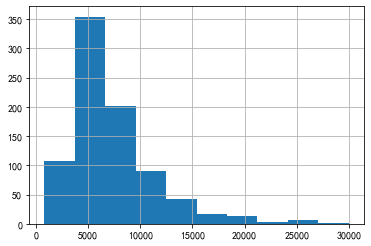

In [29]:
#3.价格分布情况
import matplotlib.pyplot as plt
df_laptop['sale_price'].hist()
plt.show()

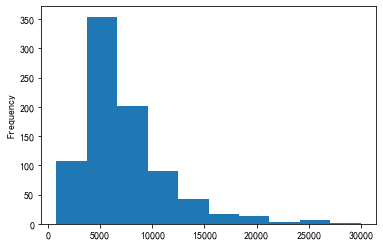

In [30]:
df_laptop['sale_price'].plot(kind='hist')
plt.show()

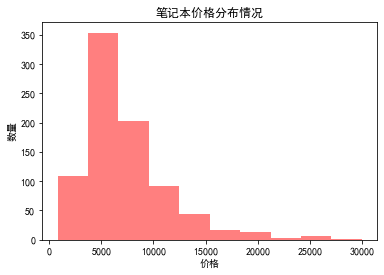

In [31]:
import matplotlib.pyplot as plt
from pylab import mpl#解决中文字体显示不正常的问题
mpl.rcParams['font.sans-serif']=['SimHei']#解决中文字体显示不正常的问题
df_laptop['sale_price'].plot(kind='hist',title='笔记本价格分布情况',color='red',alpha=0.5)
plt.xlabel('价格')
plt.ylabel('数量')
plt.show()

In [32]:
#问题三:笔记本中的爆品是那个？销量是多少？价格是多少？
#1.找到销量列最大值的位置idxmax
index=df_laptop['pro_sales_num'].idxmax()

In [33]:
#2.爆品名称
df_laptop['pro_name'][index]

'戴睿（dere） 戴睿 D17 14英寸 四核轻薄笔记本电脑 新升级款学习办公手提电脑 黑色 时尚版 4G内存320G硬盘+64G固态'

In [34]:
#3.爆品销量
df_laptop['pro_sales_num'][index]

4941.0

In [35]:
#4.爆品价格
df_laptop['sale_price'][index]

1699.0

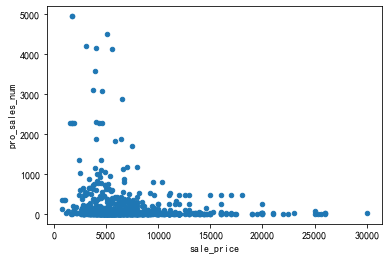

In [36]:
#问题四：在“笔记本”小分类下，销量与价格是否具有相关性？
df_laptop.plot(x='sale_price',y='pro_sales_num',kind='scatter')
plt.show()

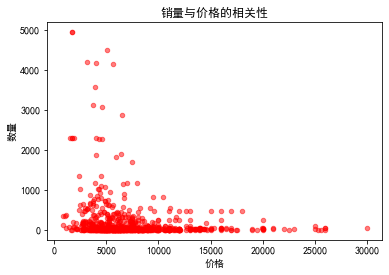

In [37]:
#问题四：在“笔记本”小分类下，销量与价格是否具有相关性？
df_laptop.plot(x='sale_price',y='pro_sales_num',kind='scatter',title='销量与价格的相关性',color='red',alpha=0.5)
plt.xlabel('价格')
plt.ylabel('数量')
plt.show()